In [1]:
import tensorflow as tf

# importing the data of images
mninist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mninist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


# creating the model
model = tf.keras.models.Sequential() # feed forward neural network
model.add(tf.keras.layers.Flatten()) # flatten the data
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # add a hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # add a hidden layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer


# compiling the model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


# training the model
model.fit(x_train, y_train, epochs=3)

2022-06-10 18:17:54.103739: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2640 - accuracy: 0.9233
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1054 - accuracy: 0.9672
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0734 - accuracy: 0.9772


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0970 - accuracy: 0.9698
0.09704447537660599 0.9697999954223633


In [11]:
# saving the model
model.save('number_classifier.model')

INFO:tensorflow:Assets written to: number_classifier.model/assets


In [12]:
new_model = tf.keras.models.load_model('number_classifier.model')

In [13]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 1ms/step


In [14]:
print(predictions)

[[9.1621807e-08 2.2955125e-07 3.2678768e-06 ... 9.9998891e-01
  3.2698935e-08 3.4149323e-07]
 [1.0882006e-06 2.8299054e-03 9.9714178e-01 ... 4.8785980e-09
  4.4344543e-07 1.7038780e-10]
 [1.8087641e-06 9.9943489e-01 1.6256770e-05 ... 1.7482994e-04
  3.1891029e-04 3.4761271e-07]
 ...
 [8.3183501e-08 9.7453303e-06 4.9032277e-08 ... 2.1312703e-04
  7.3001884e-06 1.9180097e-05]
 [5.5321198e-06 2.8252916e-07 4.3790322e-09 ... 2.4334071e-08
  1.0247536e-03 3.8378017e-10]
 [5.3097079e-07 9.5322449e-08 8.2428926e-09 ... 4.7928231e-11
  5.9505012e-08 1.1502590e-09]]


In [15]:
import numpy as np


print(np.argmax(predictions[0]))

7


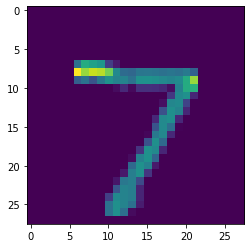

In [18]:
import matplotlib.pyplot as plt


plt.imshow(x_test[0])
plt.show()